In [1]:
# Imports
import pandas as pd

from data_adapters.deribit_adapters import read_parquet, read_clean_jsonl  # -> [`data_adapters.deribit_adapters.read_parquet`](data_adapters/deribit_adapters.py)
from config import Algo1Config, DecoderKind               # -> [`config.Algo1Config`](config.py), [`config.DecoderKind`](config.py)
from pipeline.algo1_PCA import run_algo1_deribit  

In [2]:

data_path = 'data/json/deribit_options_2025-05-22.jsonl'
df_raw = read_clean_jsonl(data_path)

# Configure and run
cfg = Algo1Config(
    n_tau=5,
    n_m=5,
    top_K=50,
    decoder=DecoderKind.HINGE_STATIC,  # or DecoderKind.PLS / DecoderKind.DEEP_PLS
    dda=0,
    dst=1,
    n_sa=1,
    seed=0,
    n_PC_sa=15,
    lam_hinge=1.0,
    price_scale=1.0,
    micro=None
)

outs = run_algo1_deribit(df_raw, cfg, reference_date="2025-05-22", r=0.0, q=0.0) 

/Users/167011/Documents/GitHub/deribit_market_model/data_adapters/deribit_adapters.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['expiry'] = pd.to_datetime(df['expiry'])
/Users/167011/Documents/GitHub/deribit_market_model/pipeline/algo1_PCA.py:194: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .resample("1T").mean()
/Users/167011/Documents/GitHub/deribit_market_model/pipeline/algo1_PCA.py:198: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .resample("1T").mean()
/Users/167011/Documents/GitHub/deribit_market_model/pipeline/algo1_PCA.py:209: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  return s.resample("1T").mean()
/Users/167011/Documents/GitHub/deribit_market_model/pipeline

In [3]:
# Quick checks
print("C_train shape:", outs.C_train.shape)
print("C_test  shape:", outs.C_test.shape)
print("Vega Weighted MAPE train/test:", outs.VW_MAPE_train, outs.VW_MAPE_test)
print("PSAS train/test:", outs.PSAS_train, outs.PSAS_test)
# print("Var Explained Dyn:", outs.var_dyn)
# print("First Dyn:", outs.first_dyn)
print("Var Stat:", outs.var_stat)
print("First Stat:0:", outs.first_stat)
print("R2 Train:", outs.R2_train)
print("R2 Test:", outs.R2_test)

C_train shape: (1101, 48)
C_test  shape: (340, 48)
Vega Weighted MAPE train/test: 0.11315464987832109 0.12355533641597252
PSAS train/test: 0.0 0.0
Var Stat: 0.49517248653484486
First Stat:0: 0.49517248653484486
R2 Train: 0.9975869524087595
R2 Test: 0.9953289450239322


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

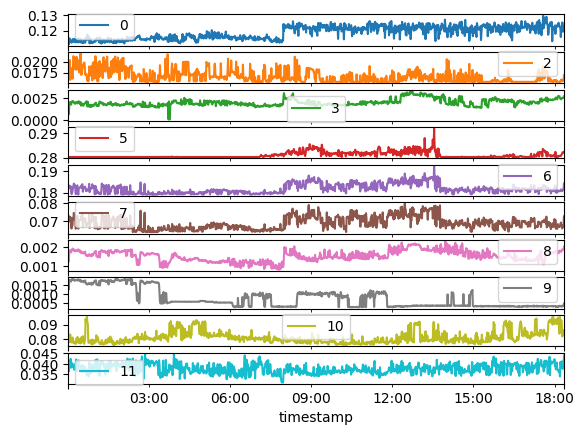

In [3]:
outs.C_train.iloc[:, : 10].plot(subplots = True)

/Users/167011/Documents/GitHub/deribit_market_model/utils/visuals.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


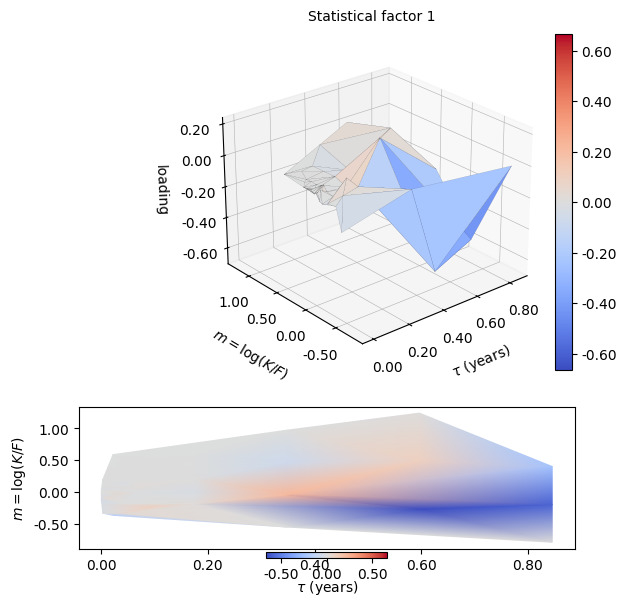

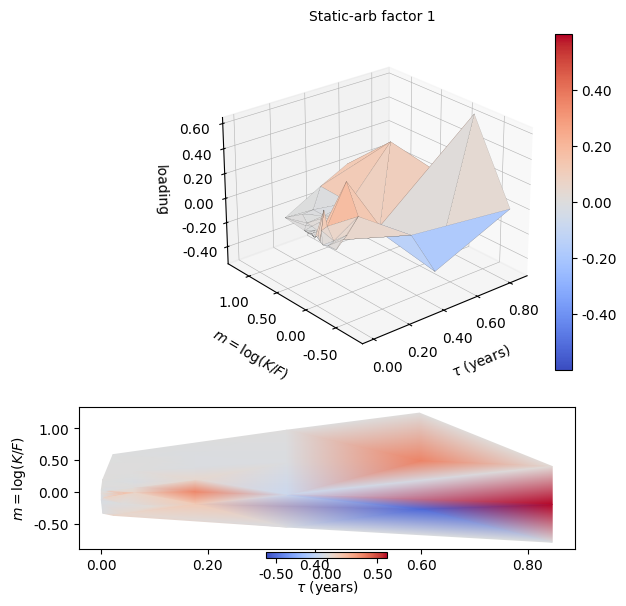

In [4]:
from utils.visuals import plot_factors_figure_731_style
# ===== Example usage once you have `out` from algorithm1_pipeline =====
plot_factors_figure_731_style(outs,
    which=("dyn","stat","sa"),
    elev=25, azim=230,              # camera angles; tweak if you need to match 1:1
    cmap="coolwarm",                # paper-like diverging colormap
    with_heatmaps=True,
    save_prefix="decoded"            # writes PNGs next to your script
)

(<Figure size 660x300 with 1 Axes>,
 <Axes: title={'center': '2-factor scores within static no-arb polygon'}, xlabel='$\\xi_s$', ylabel='$\\xi_a$'>)

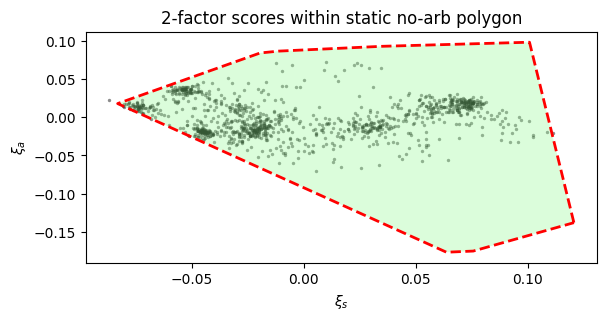

In [5]:
from utils.visuals import plot_threefactors_poly, plot_twofactor_polygon

plot_twofactor_polygon(outs)
# plot_threefactors_poly(outs)

In [7]:
from pathlib import Path
import joblib

out_dir = Path("outputs/artifacts")
out_dir.mkdir(parents = True, exist_ok = True)

joblib.dump(outs, out_dir /"algo1_outs_2025-05-22_1min_agreg.pkl")


['outputs/artifacts/algo1_outs_2025-05-22_1min_agreg.pkl']